### Trabalho de Multivariada 2

In [2]:
project_root = "/content/drive/MyDrive/"

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd 

In [175]:
df = pd.read_csv('/content/drive/MyDrive/datasets/pokedex.csv')
df.head(5)

,id,pokedex_number,name,german_name,japanese_name,generation,status,species,type_number,type_1,type_2,height_m,weight_kg,abilities_number,ability_1,ability_2,ability_hidden,total_points,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,base_friendship,base_experience,growth_rate,egg_type_number,egg_type_1,egg_type_2,percentage_male,egg_cycles,against_normal,against_fire,against_water,against_electric,against_grass,against_ice,against_fight,against_poison,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
0,7,6,Mega Charizard X,Glurak,リザードン (Lizardon),1,Normal,Flame Pokémon,2,Fire,Dragon,1.7,110.5,1,Tough Claws,NaN,NaN,634,78,130,111,130,85,100,45.0,70.0,285.0,Medium Slow,2,Dragon,Monster,87.5,20.0,1.0,0.25,1.0,0.5,0.25,1.0,1.0,1.0,2.0,1.0,1.00,0.50,2.0,1.0,2.0,1.0,0.5,1.0
1,8,6,Mega Charizard Y,Glurak,リザードン (Lizardon),1,Normal,Flame Pokémon,2,Fire,Flying,1.7,100.5,1,Drought,NaN,NaN,634,78,104,78,159,115,100,45.0,70.0,285.0,Medium Slow,2,Dragon,Monster,87.5,20.0,1.0,0.50,2.0,2.0,0.25,1.0,0.5,1.0,0.0,1.0,1.00,0.25,4.0,1.0,1.0,1.0,0.5,0.5
2,517,437,Bronzong,Bronzong,ドータクン (Dohtakun),4,Normal,Bronze Bell Pokémon,2,Steel,Psychic,1.3,187.0,3,Levitate,Heatproof,Heavy Metal,500,67,89,116,79,116,33,90.0,70.0,175.0,Medium Fast,1,Mineral,NaN,NaN,20.0,0.5,2.00,1.0,1.0,0.50,0.5,1.0,0.0,0.0,0.5,0.25,1.00,0.5,2.0,0.5,2.0,0.5,0.5
3,9,7,Squirtle,Schiggy,ゼニガメ (Zenigame),1,Normal,Tiny Turtle Pokémon,1,Water,NaN,0.5,9.0,2,Torrent,NaN,Rain Dish,314,44,48,65,50,64,43,45.0,70.0,63.0,Medium Slow,2,Monster,Water 1,87.5,20.0,1.0,0.50,0.5,2.0,2.00,0.5,1.0,1.0,1.0,1.0,1.00,1.00,1.0,1.0,1.0,1.0,0.5,1.0
4,518,438,Bonsly,Mobai,ウソハチ (Usohachi),4,Normal,Bonsai Pokémon,1,Rock,NaN,0.5,15.0,3,Sturdy,Rock Head,Rattled,290,50,80,95,10,45,10,255.0,70.0,58.0,Medium Fast,1,Undiscovered,NaN,50.0,20.0,0.5,0.50,2.0,1.0,2.00,1.0,2.0,0.5,2.0,0.5,1.00,1.00,1.0,1.0,1.0,1.0,2.0,1.0


In [66]:
used = set()
unique = [x for x in mylist if x not in used and (used.add(x) or True)]

In [68]:
unique

18

In [69]:
# agorapara geração
mylist = df['generation'].values.tolist()
used = set()
unique = [x for x in mylist if x not in used and (used.add(x) or True)]
unique

[1, 4, 5, 6, 2, 7, 8, 3]

## Bora limpar o banco e pegar o que é ultil

In [4]:
df.isnull().sum()

id                    0
pokedex_number        0
name                  0
german_name          90
japanese_name        90
generation            0
status                0
species               0
type_number           0
type_1                0
type_2              486
height_m              0
weight_kg             1
abilities_number      0
ability_1             3
ability_2           515
ability_hidden      218
total_points          0
hp                    0
attack                0
defense               0
sp_attack             0
sp_defense            0
speed                 0
catch_rate          104
base_friendship     104
base_experience     104
growth_rate           1
egg_type_number       0
egg_type_1            3
egg_type_2          746
percentage_male     236
egg_cycles            1
against_normal        0
against_fire          0
against_water         0
against_electric      0
against_grass         0
against_ice           0
against_fight         0
against_poison        0
against_ground  

In [5]:
pokedex = df[[ 'name', 'generation', 'status', 'species', 'type_number', 'type_1',
       'height_m',  'hp', 'attack', 'defense',
       'sp_attack', 'sp_defense', 'speed', 'against_normal',
       'against_fire', 'against_water', 'against_electric', 'against_grass',
       'against_ice', 'against_fight', 'against_poison', 'against_ground',
       'against_flying', 'against_psychic', 'against_bug', 'against_rock',
       'against_ghost', 'against_dragon', 'against_dark', 'against_steel',
       'against_fairy']]

In [110]:
pokedex_not_categ = df[['id','type_number', 'hp', 'attack', 'defense',
       'sp_attack', 'sp_defense', 'speed', 'against_normal',
       'against_fire', 'against_water', 'against_electric', 'against_grass',
       'against_ice', 'against_fight', 'against_poison', 'against_ground',
       'against_flying', 'against_psychic', 'against_bug', 'against_rock',
       'against_ghost', 'against_dragon', 'against_dark', 'against_steel',
       'against_fairy']]

In [111]:
pokedex_not_categ.head()

,id,type_number,hp,attack,defense,sp_attack,sp_defense,speed,against_normal,against_fire,against_water,against_electric,against_grass,against_ice,against_fight,against_poison,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
0,7,2,78,130,111,130,85,100,1.0,0.25,1.0,0.5,0.25,1.0,1.0,1.0,2.0,1.0,1.00,0.50,2.0,1.0,2.0,1.0,0.5,1.0
1,8,2,78,104,78,159,115,100,1.0,0.50,2.0,2.0,0.25,1.0,0.5,1.0,0.0,1.0,1.00,0.25,4.0,1.0,1.0,1.0,0.5,0.5
2,517,2,67,89,116,79,116,33,0.5,2.00,1.0,1.0,0.50,0.5,1.0,0.0,0.0,0.5,0.25,1.00,0.5,2.0,0.5,2.0,0.5,0.5
3,9,1,44,48,65,50,64,43,1.0,0.50,0.5,2.0,2.00,0.5,1.0,1.0,1.0,1.0,1.00,1.00,1.0,1.0,1.0,1.0,0.5,1.0
4,518,1,50,80,95,10,45,10,0.5,0.50,2.0,1.0,2.00,1.0,2.0,0.5,2.0,0.5,1.00,1.00,1.0,1.0,1.0,1.0,2.0,1.0


## Aplicadno kmenas e PCA para ver o que dá

In [21]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [112]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(pokedex_not_categ)

In [103]:
data_scaled

array([[ 0.94693134,  0.31934839,  1.54158328, ..., -0.14564429,
        -0.95451547, -0.16090197],
       [ 0.94693134,  0.31934839,  0.73803709, ..., -0.14564429,
        -0.95451547, -1.10879435],
       [ 0.94693134, -0.09774466,  0.27445275, ...,  2.07246428,
        -0.95451547, -1.10879435],
       ...,
       [-1.05604277, -0.78026055, -0.77633842, ..., -0.14564429,
         0.03914722, -0.16090197],
       [-1.05604277,  0.05392554,  0.05811339, ..., -0.14564429,
         0.03914722, -0.16090197],
       [-1.05604277, -0.93193075, -1.54897898, ...,  2.07246428,
         0.03914722, -0.16090197]])

In [17]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_scaled)
    Sum_of_squared_distances.append(km.inertia_)

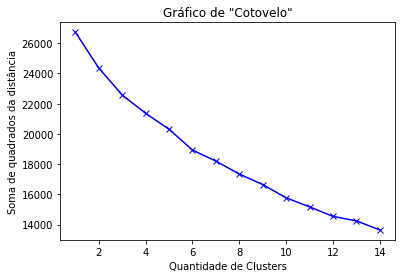

In [18]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('Quantidade de Clusters')
plt.ylabel('Soma de quadrados da distância')
plt.title('Gráfico de "Cotovelo"')
plt.show()

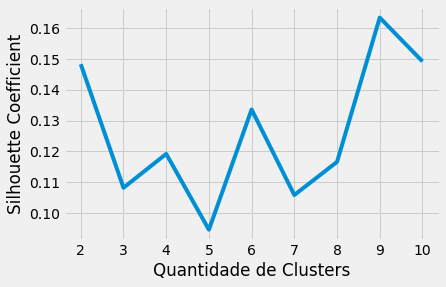

In [26]:
from sklearn.metrics import silhouette_score
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(data_scaled)
    score = silhouette_score(data_scaled, kmeans.labels_)
    silhouette_coefficients.append(score)

plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Quantidade de Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

## Usado Kmetroids e todos os dados numéricos

In [30]:
pip install scikit-learn-extra

     |████████████████████████████████| 1.7MB 17.3MB/s 
     |████████████████████████████████| 22.3MB 115kB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [31]:
from sklearn_extra.cluster import KMedoids

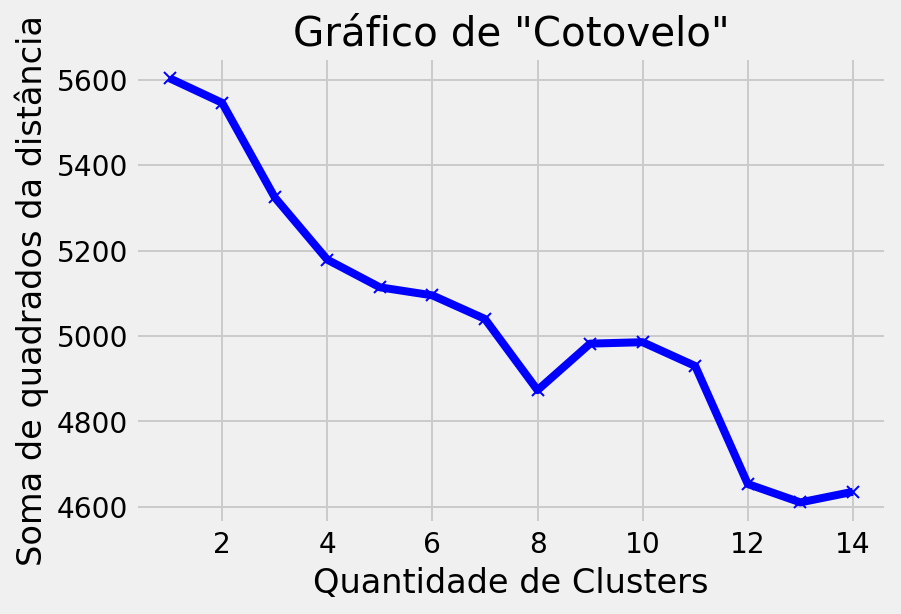

In [129]:
Sum_of_squared_distances_d = []
K = range(1,15)
for k in K:
    kmd = KMedoids(n_clusters=k)
    kmd = kmd.fit(PCA_components)
    Sum_of_squared_distances_d.append(kmd.inertia_)
    # inertia_ é a soma dos quadrados
    score = silhouette_score(PCA_components, kmeans.labels_)
    silhouette_coefficients.append(score)

plt.plot(K, Sum_of_squared_distances_d, 'bx-')
plt.xlabel('Quantidade de Clusters')
plt.ylabel('Soma de quadrados da distância')
plt.title('Gráfico de "Cotovelo"')
plt.show()

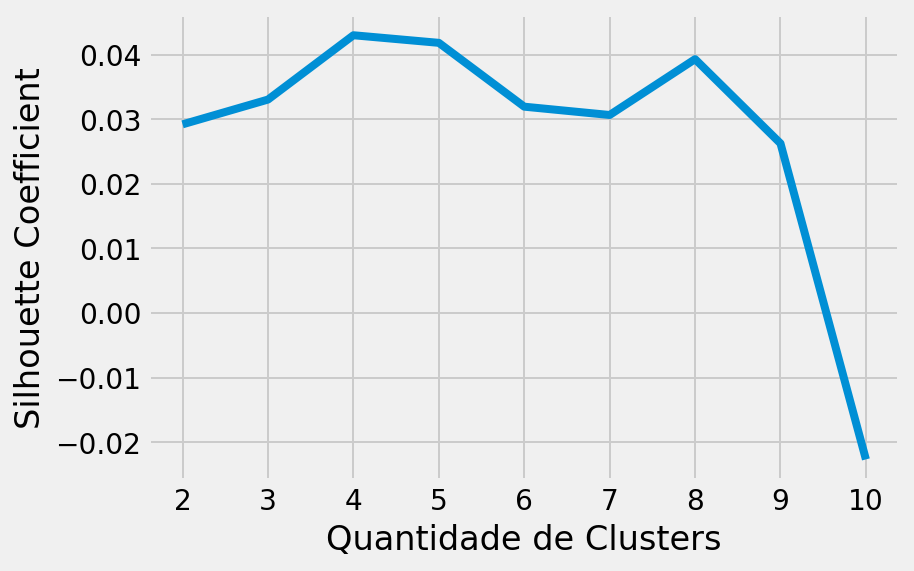

In [130]:
#scaler = StandardScaler()
#scaled_features = scaler.fit_transform(features)

kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMedoids(n_clusters=k)
    kmeans.fit(PCA_components)
    score = silhouette_score(PCA_components, kmeans.labels_)
    silhouette_coefficients.append(score)

plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Quantidade de Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [106]:
pokedex_not_categ.head(5)

,type_number,hp,attack,defense,sp_attack,sp_defense,speed,against_normal,against_fire,against_water,against_electric,against_grass,against_ice,against_fight,against_poison,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
0,2,78,130,111,130,85,100,1.0,0.25,1.0,0.5,0.25,1.0,1.0,1.0,2.0,1.0,1.00,0.50,2.0,1.0,2.0,1.0,0.5,1.0
1,2,78,104,78,159,115,100,1.0,0.50,2.0,2.0,0.25,1.0,0.5,1.0,0.0,1.0,1.00,0.25,4.0,1.0,1.0,1.0,0.5,0.5
2,2,67,89,116,79,116,33,0.5,2.00,1.0,1.0,0.50,0.5,1.0,0.0,0.0,0.5,0.25,1.00,0.5,2.0,0.5,2.0,0.5,0.5
3,1,44,48,65,50,64,43,1.0,0.50,0.5,2.0,2.00,0.5,1.0,1.0,1.0,1.0,1.00,1.00,1.0,1.0,1.0,1.0,0.5,1.0
4,1,50,80,95,10,45,10,0.5,0.50,2.0,1.0,2.00,1.0,2.0,0.5,2.0,0.5,1.00,1.00,1.0,1.0,1.0,1.0,2.0,1.0


Text(0.5, 1.0, 'KMedoids clustering. Medoids are represented in cyan.')

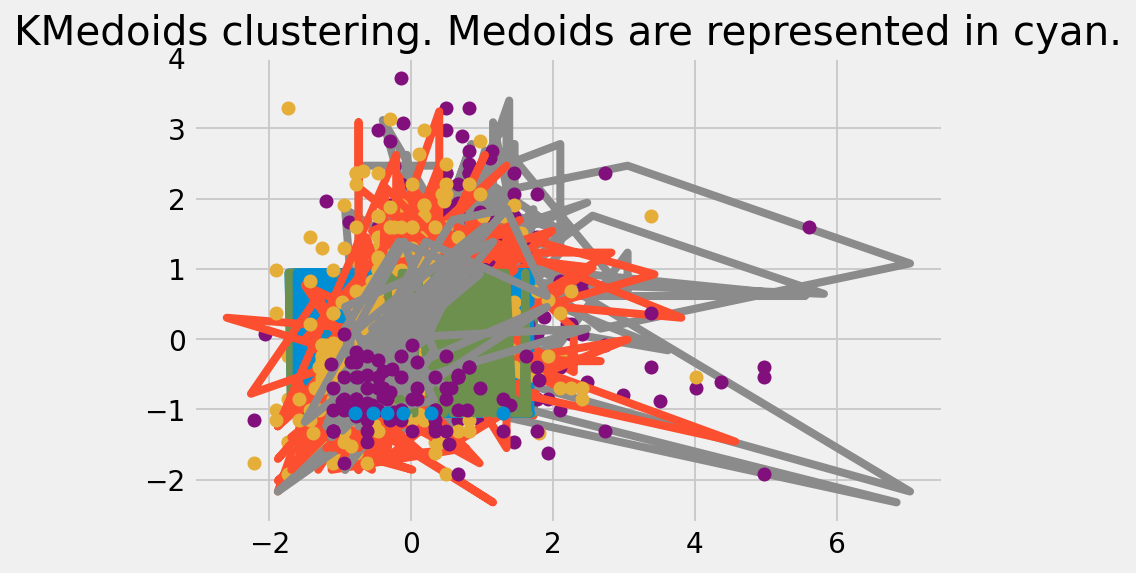

In [82]:
unique_labels = set(labels)
colors = [
    plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))
]
for k, col in zip(unique_labels, colors):

    class_member_mask = labels == k

    xy = data_scaled[class_member_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        xy[:, 2],
        xy[:, 3],
        xy[:, 4],
        xy[:, 5],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.plot(
    cobj.cluster_centers_[:, 0],
    cobj.cluster_centers_[:, 1],
    "o",
    markerfacecolor="cyan",
    markeredgecolor="k",
    markersize=6,
)

plt.title("KMedoids clustering. Medoids are represented in cyan.")

In [77]:
xy

array([[ 0.01516388, -1.05604277, -0.742343  , ..., -0.14564429,
         2.02647259, -0.16090197],
       [ 0.04549163, -1.05604277,  2.48064872, ..., -0.14564429,
         0.03914722, -0.16090197],
       [ 0.06571013,  0.94693134, -1.1215185 , ..., -0.14564429,
         0.03914722, -1.10879435],
       ...,
       [-0.09603788, -1.05604277, -0.09774466, ..., -0.14564429,
         2.02647259, -0.16090197],
       [-0.08929838,  0.94693134, -1.50069399, ..., -0.14564429,
         0.03914722, -1.10879435],
       [-0.02527313, -1.05604277, -0.55275525, ..., -0.14564429,
         0.03914722, -0.16090197]])

### Observando

## Usando PCA junto nessa análise

In [35]:
import numpy as np
from sklearn.decomposition import PCA

In [46]:
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

In [47]:
data_pca

array([[ 0.84814718,  2.25138087],
       [-0.03563862,  2.00708829],
       [ 2.3866868 ,  1.74618457],
       ...,
       [-0.61923019, -2.49479209],
       [ 0.154078  , -1.16913564],
       [-1.03283386, -0.45568649]])

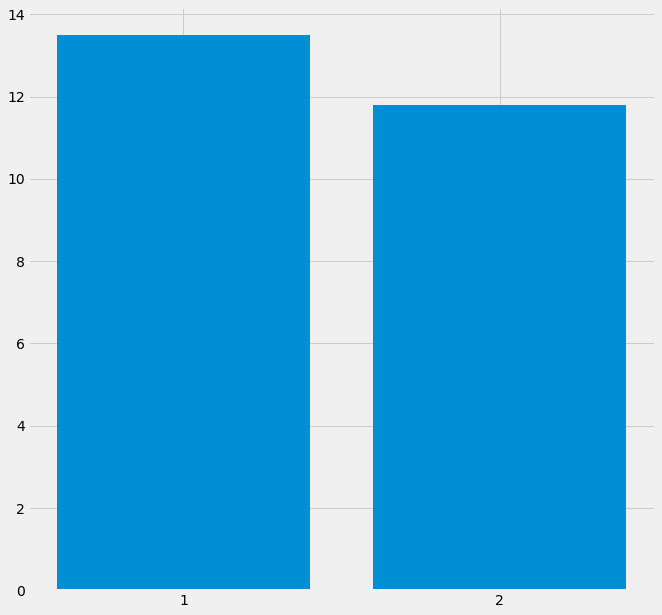

In [48]:
plt.figure(figsize=(10,10))
var = np.round(pca.explained_variance_ratio_*100, decimals = 1)
lbls = [str(x) for x in range(1,len(var)+1)]
plt.bar(x=range(1,len(var)+1), height = var, tick_label = lbls)
plt.show()

No handles with labels found to put in legend.


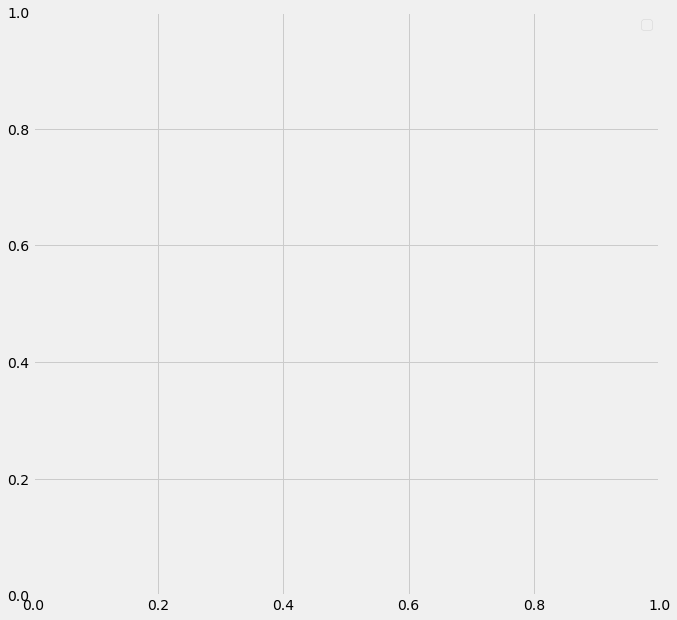

In [50]:
model = KMeans(n_clusters = 6, init = "k-means++")
label = model.fit_predict(data)
plt.figure(figsize=(10,10))
uniq = np.unique(label)
for i in uniq:
   plt.scatter(data[label == i , 0] , data[label == i , 1] , label = i)plt.scatter(centers[:,0], centers[:,1], marker="x", color='k')
#This is done to find the centroid for each clusters.
plt.legend()
plt.show()

In [39]:
print(pca.explained_variance_ratio_)

print(pca.singular_values_)

[0.13541882 0.11809769 0.09981585 0.07930786 0.07246208 0.06448694]
[60.16206623 56.18287265 51.6515045  46.04063857 44.00870827 41.51634673]


In [ ]:
## outro

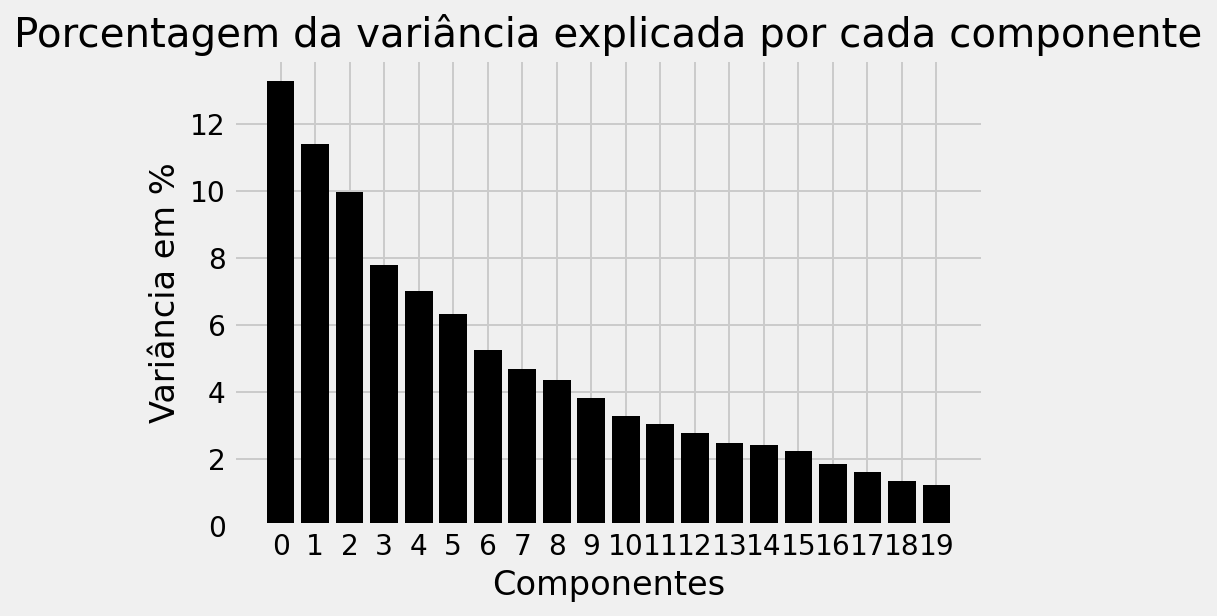

In [127]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%config InlineBackend.figure_format='retina'# Load in the data
df = pokedex_not_categ# Standardize the data to have a mean of ~0 and a variance of 1
X_std = StandardScaler().fit_transform(df)# Create a PCA instance: pca
pca = PCA(n_components=20)
principalComponents = pca.fit_transform(X_std)# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_*100, color='black')
plt.xlabel('Componentes')
plt.ylabel('Variância em %')
plt.title('Porcentagem da variância explicada por cada componente')
plt.xticks(features)# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)

Text(0, 0.5, 'PCA 2')

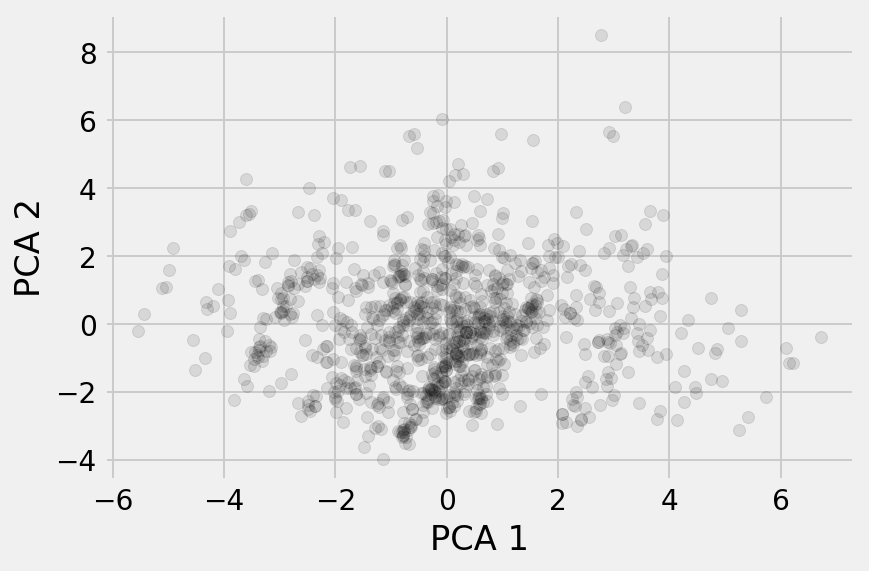

In [54]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

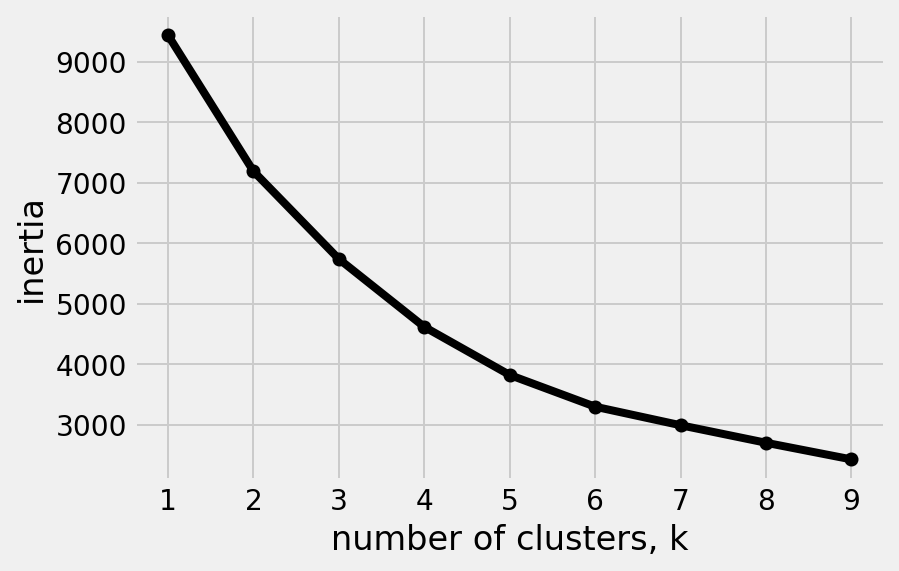

In [56]:
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:3])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

## OPA


In [170]:
cobj = KMedoids(n_clusters=6).fit(PCA_components[[0, 1, 2, 3, 4, 5]])
labels = cobj.labels_


X = PCA_components[[0, 1, 2, 3]]

pokedex_not_categ["category"] = labels

In [171]:
PCA_components["category"] = labels


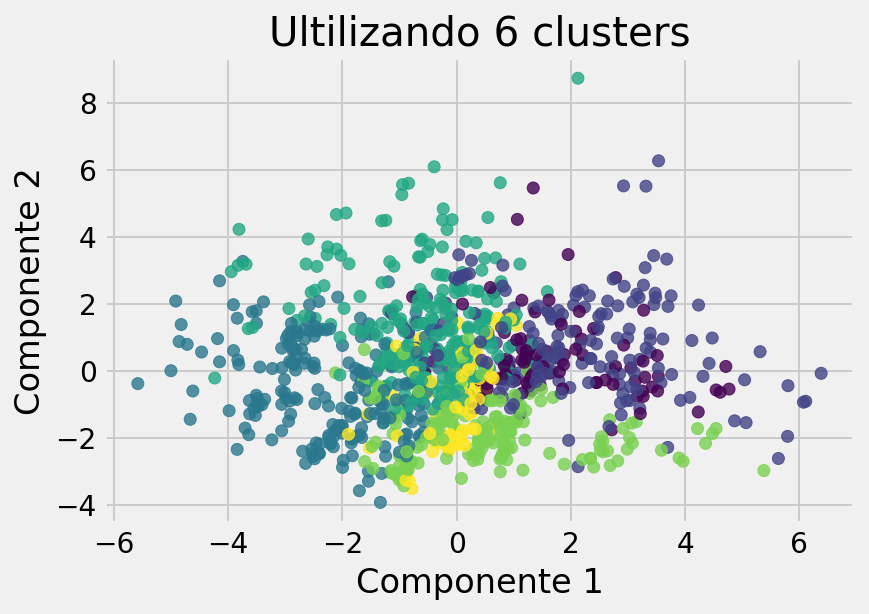

In [172]:
plt.scatter(PCA_components[0], PCA_components[1], c = PCA_components["category"], alpha=0.8)
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.title('Ultilizando 6 clusters')
plt.show()

In [153]:
cobj.cluster_centers_[:, 0]
cobj.cluster_centers_[:, 1],
cobj.cluster_centers_[:, 2],
cobj.cluster_centers_[:, 3],

(array([ 0.85803682, -0.98025896, -0.11505558]),)

In [168]:
cobj.medoid_indices_

array([996, 640, 993, 322, 995, 918])

In [176]:
df.iloc[cobj.medoid_indices_]

,id,pokedex_number,name,german_name,japanese_name,generation,status,species,type_number,type_1,type_2,height_m,weight_kg,abilities_number,ability_1,ability_2,ability_hidden,total_points,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,base_friendship,base_experience,growth_rate,egg_type_number,egg_type_1,egg_type_2,percentage_male,egg_cycles,against_normal,against_fire,against_water,against_electric,against_grass,against_ice,against_fight,against_poison,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
996,482,405,Luxray,Luxtra,レントラー (Rentorar),4,Normal,Gleam Eyes Pokémon,1,Electric,NaN,1.4,42.0,3,Rivalry,Intimidate,Guts,523,80,120,79,95,79,70,45.0,70.0,235.0,Medium Slow,1,Field,NaN,50.0,20.0,1.0,1.0,1.0,0.5,1.0,1.0,1.0,1.0,2.0,0.5,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0
640,900,774,Minior Meteor Form,Meteno,メテノ (Meteno),7,Normal,Meteor Pokémon,2,Rock,Flying,0.3,40.0,1,Shields Down,NaN,NaN,440,60,60,100,60,100,60,30.0,70.0,154.0,Medium Slow,1,Mineral,NaN,NaN,25.0,0.5,0.5,2.0,2.0,1.0,2.0,1.0,0.5,0.0,0.5,1.0,0.5,2.0,1.0,1.0,1.0,2.0,1.0
993,479,402,Kricketune,Zirpeise,コロトック (Korotock),4,Normal,Cricket Pokémon,1,Bug,NaN,1.0,25.5,2,Swarm,NaN,Technician,384,77,85,51,55,51,65,45.0,70.0,134.0,Medium Slow,1,Bug,NaN,50.0,15.0,1.0,2.0,1.0,1.0,0.5,1.0,0.5,1.0,0.5,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0
322,702,604,Eelektross,Zapplarang,シビルドン (Shibirudon),5,Normal,EleFish Pokémon,1,Electric,NaN,2.1,80.5,1,Levitate,NaN,NaN,515,85,115,80,105,80,50,30.0,70.0,232.0,Slow,1,Amorphous,NaN,50.0,20.0,1.0,1.0,1.0,0.5,1.0,1.0,1.0,1.0,0.0,0.5,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0
995,481,404,Luxio,Luxio,ルクシオ (Luxio),4,Normal,Spark Pokémon,1,Electric,NaN,0.9,30.5,3,Rivalry,Intimidate,Guts,363,60,85,49,60,49,60,120.0,100.0,127.0,Medium Slow,1,Field,NaN,50.0,20.0,1.0,1.0,1.0,0.5,1.0,1.0,1.0,1.0,2.0,0.5,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0
918,414,351,Castform Rainy Form,Formeo,ポワルン (Powalen),3,Normal,Weather Pokémon,1,Water,NaN,0.3,0.8,1,Forecast,NaN,NaN,420,70,70,70,70,70,70,45.0,70.0,147.0,Medium Fast,2,Amorphous,Fairy,50.0,25.0,1.0,0.5,0.5,2.0,2.0,0.5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0


In [157]:
print('Label   Medoid        Index')
print('---------------------------')
for index in cobj.medoid_indices_:
    label = cobj.labels_[index]
    medoid = X[index]
    print(f'{label:<7} {medoid}  {index}')

Label   Medoid        Index
---------------------------


KeyError: ignored